<a href="https://colab.research.google.com/github/raaraya1/Personal-Proyects/blob/main/Cursos/Fastai/Notas_de_la_clase4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clase 4 - Deep Learning for Coders**

# **Respuestas al cuestionario**

1. **¿Por qué cambiamos las dimensiones de la imagen, primero a un tamaño grande en la CPU y luego a un tamaño más pequeño en la GPU?**

No estoy tan seguro si esta sera la respuesta correcta, pero me imagino que esta pregunta esta relacionada con el proceso de precizing. Justamente el primer objetivo con este proceso es obtener una imagen cuadrada, utilizando el largo o ancho mas grande para encuadrar. Por otro lado, la segunda transformacion de tamaño se hace con el objetivo de trabajar con una menor cantidad de informacion junto con estandarizar las imagenes que se utilizar para el entrenamiento (que todas las fotos tengan las mismas dimensiones).


2. **Si no está familiarizado con las expresiones regulares, busque un tutorial de expresiones regulares y algunos conjuntos de problemas y complételos. Eche un vistazo al sitio web del libro para obtener sugerencias.**

Al final de este notebook deje un par de ejemplos de como trabajar con esta biblioteca (junto a un resumen de sus principales funciones)

3. **¿Cuáles son las dos formas en que los datos se proporcionan con más frecuencia para la mayoría de los conjuntos de datos de aprendizaje profundo?**

- Archivos individuales organizados en carpetas.
- Tabla de datos, siendo las filas los elementos de informacion.

4. **Busque la documentación de `L` e intente usar algunos de los nuevos métodos que agrega.**

```
class L
[source]

    L(items=None, *rest, use_list=False, match=None) :: GetAttr

Behaves like a list of items but can also index with list of indices or masks
```

Al final del notebook, anduve probando algunos de sus metodos.

5. **Busque la documentación del módulo `pathlib` de Python e intente usar algunos métodos de la clase` Path`.**

Tambien desarrolle algunos ejercicios con la libreria de pathlib al final de este notebook.

6. **Dé dos ejemplos de formas en que las transformaciones de imágenes pueden degradar la calidad de los datos.**

- Cuando rotamos una imagen debemos rellenar los espacios que se generan en las esquinas (tipicamente se interpolan los pixel) y al hacer este completado es que normalmente se puede observar distorsiones en la imagen.

- Con el metodo para estrechar las imagenes, estas tambien resultan destorsionadas, puesto que lo contenido en la imagen pierden sus proporciones originales (se ven mas angostas o estrechas de los que son)

7. **¿Qué método proporciona fastai para ver los datos en un "DataLoaders"?**

Fastai proporciona el metodo `show_batch`.

8. **¿Qué método proporciona fastai para ayudarlo a depurar un `DataBlock`?**

Fastai nos proporciona el metodo `summary` para hacer corregir errores al cargar los datos.

9. **¿Debería retrasar el entrenamiento de un modelo hasta que haya limpiado a fondo sus datos?**

La respuesta es NO. Fastai recomienda iniciar un entenamiento pequeño y con este averiguar cuales son los datos que le resultan mas conflictivos.

10. **¿Cuáles son las dos piezas que se combinan en cross-entropy loss en PyTorch?**

- Softmax: La cual transforma las predicciones en valores entre 0 y 1 (probabilidades)
- Log likelihood: La cual toma estos valores entre 0 y 1, los trata con logaritmos y retorna valores entre menos infinito y cero (este corresponde luego pasa a ser la perdida)

11. **¿Cuáles son las dos propiedades de las activaciones que asegura softmax? ¿Porque es esto importante?**

No estoy tan seguro si se referira a esto, pero la funcion softmax permite obtener valores entre 0 y 1, sin nunca llegarse a obtener 0 o 1. Asi, esta funcion permite 'exagerar' las diferencias que se generan entre las predicciones, dado que estas pasan por una funcion exponencial, antes de calcular el total.

12. **¿Cuándo podría desear que sus activaciones no tengan estas dos propiedades?**

Una podria ser, por ejemplo, cuando no se intente 'exagerar las diferencias', con esto me refiero a que cross-entropy funciona particularmente bien para los casos en que se busque armar un clasificador que escoja 1 sola de las categorias, pero no funcionaria tan bien, por ejemplo si de los resultados que espero obtener contienen mas de una respuesta o en lugar de eso obtener una respuesta distinta a un modelo de clasificacion (como la de obtener un numero continuo en lugar de obtener una probabilidad)


13. **Calcule las columnas `exp` y` softmax` de 'bear_softmax' usted mismo (es decir, en una hoja de cálculo, con una calculadora o en un cuaderno).**

```python
from numpy import exp, sum, array, round

salida = array([0.02, -2.49, 1.25])

salida_exp = round(array([exp(i) for i in salida]), 2)

def softmax(x):
  suma = array([exp(i) for i in x]).sum()
  lista = [round(exp(i)/suma, 2) for i in x]
  return lista

print(salida_exp)
>> [1.02 0.08 3.49]

print(softmax(salida)
>> [0.22, 0.02, 0.76]
```


14. **¿Por qué no podemos usar `torch.where` para crear una función de pérdida para conjuntos de datos donde nuestra etiqueta puede tener más de dos categorías?**

La estructura del `torch.where` tiene una estructura como la que sigue: `if condicion == True: categoria1 else: categoria2`. Asi, esta puede revisar una condicion a la vez. Para el caso del clasificador de 3 y 7, esta funcion, mas que funcionar como un clasificador, lo que hacia era preguntarse si el numero era un 3 y si no lo era, por descarte corresponderia a un 7.

15. **¿Cuál es el valor de log (-2)? ¿Por qué?**

```python
import numpy as np

print(np.log(-2))
>> nan
```

Esto resulta ser asi porque la funcion `log` solo soporta valores mayores a 0. El siguiente grafico muestra como actua la funcion `log`.

```python
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 500)
y = [np.log(i) for i in x]
plt.plot(x, y)
plt.show()
```
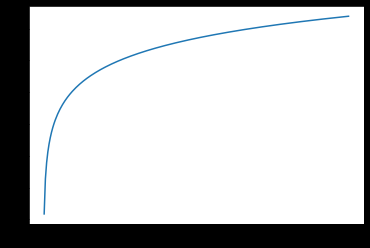


16. **¿Cuáles son dos buenas reglas generales para elegir una tasa de aprendizaje del buscador de tasas de aprendizaje?**

Una posibilidad es utilizando el metodo que proporciona Fastai para su busqueda `lr_find()`. Este es un metodo iterativo por el cual en cada iteracion se hace pasar un batch, utilziando algun learning rate (el cual va ir aumentando en cada iteracion) y caclulando el loss generado. Asi luego podemos visualizar cual fue el learning rate que produjo la menor perdida.

Una segunda manera es utilizando 'Discriminative Learning Rates', a lo que se refiere es utilizar un larning rate que no sea fijo, sino que vaya cambiando a medida que va trascurriendo el entrenamiento.

17. **¿Cuáles son los dos pasos que realiza el método `fine_tune`?**

- Reemplazar la ultima capa del modelo para ajustarlo a la respuesta que esperamos obtener. En este se congelan los parametros del modelo preentrenado y se trabaja ajustando los de la capa que agregamos.

- Cuando ya ajustamos mas menos los parametros de la ultima capa, lo que sigue es descongelar el resto de los parametros del modelo y realizar algunos nuevos ciclos de entrenamiento (para esto tmabien es recomendable volver a sacar un buen learning rate con `lr_find()`)


18. **En Jupyter Notebook, ¿cómo se obtiene el código fuente de un método o función?**

Este se obtiene con `??`, luego de llamar a la funcion. Adicionalmente los metodos de Fastai se pueden revisar con la funcion `doc()`

19. **¿Qué son las tasas de aprendizaje discriminativas?**

Son learning rates que varian a medida que avanza el entrenamiento. Tipicamente, este tiene una configuracion decreciente, en la cual se inicia con LR mas altos (lo cual permite tomar pasos mas grandes en la direccion que apunta el gradiente) y se termina con LR mas bajos (para luego no generar divergencias con el gradiente)

20. **¿Cómo se interpreta un objeto `slice` de Python cuando se pasa como una tasa de aprendizaje a fastai?**

En la clase se utilizo de esta manera `lr_max=slice(1e-6,1e-4)` y lo que representa es el inicio y el final de lo que va a variar nuestro LR a medida que transcurre el entrenamiento. Para este caso, este incia con un valor de `1e-4` disminuyendo en `(1e-4 - 1e-6)/num_epochs` hasta llegar al valor de `1e-6`.

21. **¿Por qué detenerse antes de tiempo es una mala elección cuando se usa el entrenamiento de 1 ciclo?**

Porque no se da suficiente tiempo para observar en que punto el modelo empieza a empeorar en sus predicciones.

22. **¿Cuál es la diferencia entre `resnet50` y` resnet101`?**

La principal diferencia se encuentra en las arquitecturas de los modelos, puesto que la 'resnet50' cuenta con una menor cantidad de parametros y capas que el modelo 'resnet101' (si no mal recuerdo el numero inidca la cantidad de capas que posee el modelo). Asimismo modelos con una mayor cantidad de parametros presentan una mayor condicion de memoria para su entrenamiento.

23. **¿Qué hace `to_fp16`?**

Esto reduce el formato de los numeros que se utilizan en el modelo. En otras palabras ayuda a trabajar con una menor cantidad de memoria, ya que estos nuevos no son tan precisos (poseen una menor cantidad de decimales por ejemplo)

## **Clasificador razas de mascotas**

En la primera clase se contruyo un modelo para clasificar fotos de perros y gatos, sin emgargo, este dataset presenta un segundo desafio, el cual consiste en segmentar por la raza de las mascotas.

Esto resulta mas complicado de hacer y sucede que para elaborar clasificadores con mas de dos respuestas, es que a continuacion se introduce la funcion Softmax.

### **Preparativos**

In [ ]:
# Importar bobliotecas
!pip install -Uqq fastbook
import fastbook
from fastai.vision.all import *
from fastbook import *

In [ ]:
# importar dataset
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [ ]:
# Veamos el contenido de la carpeta
Path.BASE_PATH = path
path.ls()

(#2) [Path('annotations'),Path('images')]

In [ ]:
# Ahora el contenido de la carpeta de imagenes
(path/"images").ls()

(#7393) [Path('images/chihuahua_98.jpg'),Path('images/Russian_Blue_10.jpg'),Path('images/Birman_134.jpg'),Path('images/leonberger_9.jpg'),Path('images/yorkshire_terrier_64.jpg'),Path('images/great_pyrenees_182.jpg'),Path('images/Egyptian_Mau_67.jpg'),Path('images/British_Shorthair_174.jpg'),Path('images/Persian_76.jpg'),Path('images/Abyssinian_175.jpg')...]

In [ ]:
# Notemos que la raza se encuentra en los nombre de las imagenes
# Esto me imprime la ruta, pero solo quiero la raza
## En el libro se recomenienda utilizar 'regular expresions' para abordar esto
fname = (path/"images").ls()[0]
re.findall(r'(.+)_\d+.jpg$', fname.name)


['chihuahua']

#### **Usando la funcion del libro**

In [ ]:
# esta es la manera de la clase
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


#### **Definiendo mi propia funcion**

In [ ]:
# Esto es lo que se me ocurriria hacer a mi
## Ojo que toma un tiempo (no esta optimizado para nada)

lista_final = []

for i in range(len((path/"images").ls())):
  # Transformar a str
  fname = str((path/"images").ls()[i])

  # Borrar la parte inicial
  fname = fname.replace('/root/.fastai/data/oxford-iiit-pet/images/', '')

  # Borrar la parte del final
  fname = fname.replace('.jpg', '')

  # Separo con '_'
  # Elimino el ultimo elemento y vuelvo a pegar
  fname = fname.split('_')
  fname.pop()
  
  if len(fname) > 1:
    fname1 = ''
    for i in range(len(fname)):
      fname1 += fname[i] + '_'
    fname1 = fname1[:-1]
    lista_final.append(fname1)
  else:
    lista_final.append(fname[0])

print(lista_final[:10])
print(len(lista_final))

['chihuahua', 'Russian_Blue', 'Birman', 'leonberger', 'yorkshire_terrier', 'great_pyrenees', 'Egyptian_Mau', 'British_Shorthair', 'Persian', 'Abyssinian']
7393


In [ ]:
def funcion1(name):
  fname = str(name)
  fname = fname.replace('/root/.fastai/data/oxford-iiit-pet/images/', '')
  fname = fname.replace('.jpg', '')
  fname = fname.split('_')
  fname.pop()
  if len(fname) > 1:
    fname1 = ''
    for i in range(len(fname)):
      fname1 += fname[i] + '_'
    fname1 = fname1[:-1]
  else:
    fname1 = fname[0]  
  return fname1


In [ ]:
# En get_y coloque la funcion
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(funcion1, 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

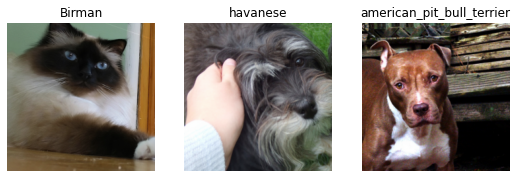

In [ ]:
# parece que cargo bien las etiquetas de las imagenes
dls.show_batch(nrows=1, ncols=3)

### **Precizing**

Este concepto hace referencia a cuando aplicamos transformaciones en las imagenes, generando espacios vacios, los cuales debemos rellenar con algun contenido. 

Por ejemplo, si tenemos una imagen puesta en un marco cuadrado y la rotamos en 45 grados, habra ciertos sectores de la imagen que se perderan (las esquinas) y en su lugar se vera el fondo del marco.

El metodo 'tradicional' con el cual se aborda este problema es utilizando iterpolacion entre los pixeles de la imagen. Sin emgargo, Fastai utiliza un enfoque distinto.

- Se recorta una imagen, dejandola cuadrada de largo y ancho igual al minimo entro los largos y anchos originales de la imagen. (esto se hace para todas la imagenes en item_tfms)
- Se aplica un 'random crop' y algunas de las tecnicas de 'augmentation'. (se aplica a las imagenes del batch en item_tfms)

En estas lineas de codigo fue donde se implemento este proceso.
```
item_tfms=Resize(460)
batch_tfms=aug_transforms(size=224, min_scale=0.75)
```

### **Debuggin**

In [ ]:
pets.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Bengal_120.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Bengal_120.jpg
    applying partial gives
      Bengal
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(1)

Final sample: (PILImage mode=RGB size=500x375, TensorCategory(1))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: 

## **Generando el modelo**


In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.514722,0.327224,0.110284,01:10


epoch,train_loss,valid_loss,error_rate,time
0,0.499464,0.297745,0.085250,01:14
1,0.329423,0.222157,0.072395,01:14


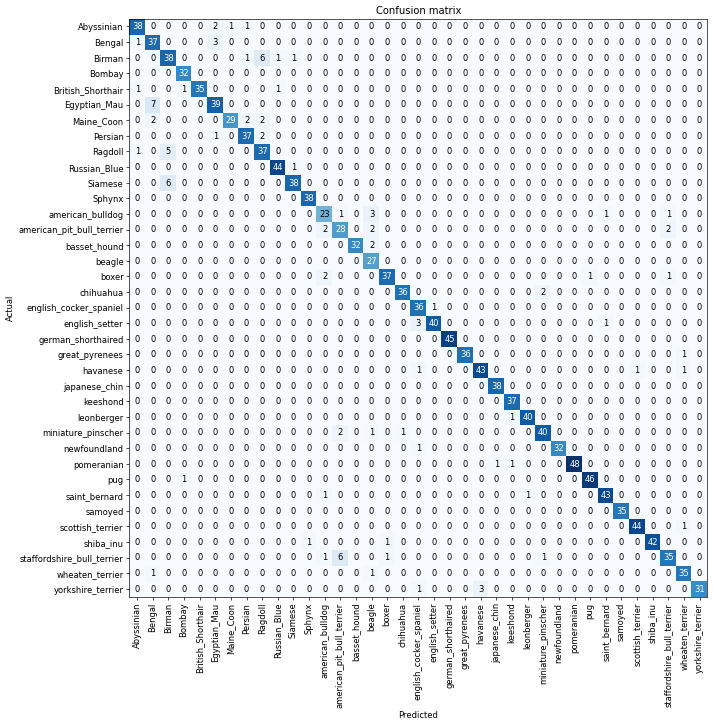

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

## **Cross-Entropy Loss**

Caracteristicas:

- Sirve para clasificacion con mas de dos categorias (la sigmoide solo para dos).
- Tiene buen desempeño en velocidad de entrenamiento.



In [ ]:
# saquemos una muestra
x,y = dls.one_batch()
y

TensorCategory([ 3, 32,  1,  1, 23, 24, 18,  0, 20, 24, 12, 26,  0, 10,  9,  8, 20, 24, 12, 24, 25, 28,  2, 13, 22, 35,  6, 35, 24, 34,  3, 28, 17, 15, 30,  6, 32, 25, 30, 22,  0, 23, 33, 31, 31, 28, 19, 28,
        32, 35, 21, 31, 35, 19, 17, 23,  2, 23,  7, 19, 27, 21,  4,  3], device='cuda:0')

In [ ]:
# la funcion get_preds retorna las predicciones y las etiquetas por defecto
# el indice 0 es para referirnos al set de entranamiento
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([5.0334e-06, 2.8207e-05, 1.0780e-06, 9.9933e-01, 1.8678e-04, 8.3221e-07, 3.8392e-05, 1.9252e-05, 8.3272e-06, 8.5113e-05, 1.6376e-04, 3.1505e-05, 1.1164e-08, 1.2514e-07, 1.7051e-07, 2.7224e-08,
        4.5587e-06, 2.8459e-06, 9.3249e-07, 1.3647e-07, 9.4903e-07, 1.5347e-07, 5.1631e-08, 4.8029e-06, 2.2869e-06, 4.0709e-07, 6.2117e-06, 5.4192e-07, 5.7374e-05, 8.2853e-06, 9.5271e-08, 1.2107e-06,
        2.4807e-06, 1.7800e-06, 4.0538e-07, 5.2954e-07, 3.0796e-06])

### **Softmax Function**

Similar a como utilizabamos la funcion sigmoide para transformar las predicciones en valores entre 0 y 1, esta funcion pretende hacer lo mismo, pero no solo aplicado a 2 categorias.

\begin{equation}
F(pred_{i}) = \frac{e^{pred_{i}}}{\sum_{i} e^{pred_{i}}}
\end{equation}

In [ ]:
# ejemplo 2 categorias
torch.random.manual_seed(42)
acts = torch.randn((6,2))*2
acts

# sigmoide
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

In [ ]:
# softmax
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

### **Log Likelihood**

Recordando cuando trabajamos con la sigmoide.
```python
def mnist_loss(inputs, targets):
    inputs = inputs.sigmoid()
    return torch.where(targets==1, 1-inputs, inputs).mean()
```

Ahora, en lugar de utilir el `torch.where`, tenemos que guiarnos por el target, para retornar la perdida.


In [ ]:
targ = tensor([0,1,0,1,1,0])
idx = range(6)
sm_acts[idx, targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

In [ ]:
df = pd.DataFrame(sm_acts, columns=["3","7"])
df['targ'] = targ
df['idx'] = idx
df['loss'] = sm_acts[range(6), targ]
df

,3,7,targ,idx,loss
0,0.602469,0.397531,0,0,0.602469
1,0.502065,0.497935,1,1,0.497935
2,0.133188,0.866811,0,2,0.133188
3,0.996640,0.003360,1,3,0.003360
4,0.595949,0.404051,1,4,0.404051
5,0.366118,0.633882,0,5,0.366118


In [ ]:
# Esta funcion sirve para ir buscando por los indices 
## La unica diferencia es que deja los valores negativos 
## NO APLICA NINGUNA FUNCION DE LOG
### SI SE QUIERE APLICAR CON LOG, ES NECESARIO USAR log_softmax EN LUGAR DE SOLO softmax
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

Ahora que tenemos asegurado el trabajar con valores que no se nos vayan a ir a cero (por todo el tema de los gradientes cuando se iban a 0) al utilzar la funcion de softmax (regresa valores entre 0 y 1) se nos genera un problema, no muy grande, pero si que afecta a la manera de hacer diferencias entre lo correcto y lo que no.

Es por eso que, ahora que nos aseguramos trabajar con un dominio comodo (valores entre 0 y 1), lo que vamos a hacer ahora es incrementar estas diferencias utilizando logaritmos (recordar que los logaritmos tienen un comportamiento similar a trabajar con porcentajes).

Importante de recordar para la funcion de log:
- Para valores entre 0 y 1, los mas cercanos a cero se vuelven mas negativos, en cambio los cercanos a 1 se vuelven mas cercanos a cero.


\begin{equation}
Loss = -\sum_{i} y_{i}^{real}log(y_{i}^{pred})
\end{equation}

Recordando que:
\begin{equation}
y_{i}^{pred} = F(pred_{i}) = \frac{e^{pred_{i}}}{\sum_{i} e^{pred_{i}}}
\end{equation}

In [ ]:
# este proceso se resume en la siguiente funcion de perdida
loss_func = nn.CrossEntropyLoss() # esta ya incluye el paso de la softmax y el log
loss_func(acts, targ)

tensor(1.8045)

In [ ]:
# la misma varsion pero como funcion
F.cross_entropy(acts, targ)

tensor(1.8045)

## **Mejorando el modelo**


### **Learning Rate Finder**

Herramienta super util que proporciona Fastai para **identificar un Learning Rate**, que funcione bien el modelo de redes neuronales. 

Se basa principalmente en ir modificando el LR pasando un mini-batch por el modelo e ir monitoreando en con que LR se produjo el menor Loss (se aplica entre medio la funcion log para tener una medida mas porcentual de la perdida)

Minimum/10: 1.00e-03


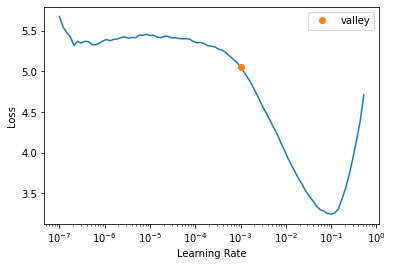

In [ ]:
# En la clase aparece que esta funcion regresa dos valores, pero 
# revisando la funcion a mi solo me aparece 1
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min = learn.lr_find()
print(f"Minimum/10: {lr_min[0]:.2e}")

### **Transfer learning**

Lo que se hace con transfer learning es utilizar un modelo preentrenado (que sirva para los propositos que buscamos), quitarle la ultima capa (donde se encuetran las categorias) y cambiarlas por las categorias que nosotros buscamos.

Al reemplazar esta capa con la nueva, esta se encontrara con pesos asignados de manera aleatoria. Asi, el objetivo es ajustar los pesos de la ultima capa de forma tal que se ajuste con la tarea solicitada.

Cuando llamamos a la funcion `fine_tune` lo que se hace es lo siguiente:
1. Corremos 1 iteracion, cambiando solo los pesos de la capa que añadimos (el resto de los parametros se 'congelan')
2. Luego 'descongelamos' el resto de los parametros y lo entrenamos de manera normal.


In [ ]:
# Con fit_one_cycle corremos una iteracion y solo cambiamos los pesos de la ultima capa
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.120074,0.282585,0.091340,01:12
1,0.544851,0.244229,0.076455,01:14
2,0.322937,0.220510,0.062923,01:13


In [ ]:
# Ahora descongelamos el resto de los parametros del modelo
learn.unfreeze()

SuggestedLRs(valley=7.585775892948732e-05)

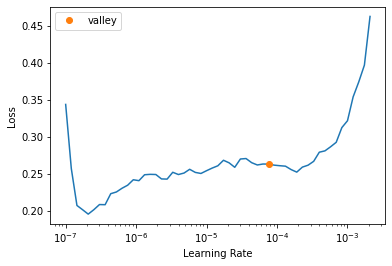

In [ ]:
# Volvemos a buscar el learning rate que mas reduce la perdida en el modelo
learn.lr_find()

In [ ]:
# Seguimos entrenando de manera normal
learn.fit_one_cycle(6, lr_max=7e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.252885,0.231448,0.070365,01:17
1,0.276185,0.251703,0.072395,01:16
2,0.228403,0.233608,0.069689,01:16
3,0.162780,0.195193,0.058187,01:17
4,0.123508,0.181858,0.056157,01:16
5,0.111799,0.175270,0.054804,01:17


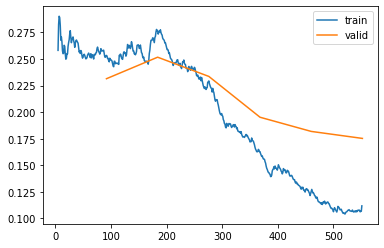

In [ ]:
learn.recorder.plot_loss()

### **Discriminative Learning Rates**

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(7e-6,7e-4)) # en promedio da 7e-5 (el anterior que use)

epoch,train_loss,valid_loss,error_rate,time
0,1.102594,0.294723,0.089986,01:11
1,0.525076,0.240873,0.078484,01:11
2,0.330368,0.193184,0.064276,01:12


epoch,train_loss,valid_loss,error_rate,time
0,0.257553,0.192604,0.065629,01:18
1,0.246240,0.216538,0.065629,01:15
2,0.270239,0.260855,0.077808,01:16
3,0.244116,0.223683,0.068336,01:15
4,0.175532,0.216621,0.067659,01:17
5,0.141088,0.206561,0.062923,01:16
6,0.106554,0.204736,0.058863,01:16
7,0.083757,0.178477,0.050068,01:17
8,0.063875,0.177435,0.052097,01:17
9,0.056280,0.179013,0.051421,01:15


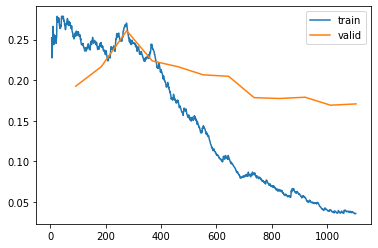

In [ ]:
learn.recorder.plot_loss()

### **Mixed-Precision Training**

In [ ]:
from fastai.callback.fp16 import *
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

# **Adicionales**

## **Regular Expresions**

Fuente original: https://github.com/CoreyMSchafer/code_snippets/tree/master/Python-Regular-Expressions

```

.       - Any Character Except New Line
\d      - Digit (0-9)
\D      - Not a Digit (0-9)
\w      - Word Character (a-z, A-Z, 0-9, _)
\W      - Not a Word Character
\s      - Whitespace (space, tab, newline)
\S      - Not Whitespace (space, tab, newline)

\b      - Word Boundary
\B      - Not a Word Boundary
^       - Beginning of a String
$       - End of a String

[]      - Matches Characters in brackets
[^ ]    - Matches Characters NOT in brackets
|       - Either Or
( )     - Group

Quantifiers:
*       - 0 or More
+       - 1 or More
?       - 0 or One
{3}     - Exact Number
{3,4}   - Range of Numbers (Minimum, Maximum)


#### Sample Regexs ####

[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+

```


In [ ]:
# Importar biblioteca
import re

In [ ]:
# Algunos ejemplos

archivos = '''
images/chihuahua_98.jpg
images/Russian_Blue_10.jpg
images/Birman_134.jpg
images/leonberger_9.jpg
images/yorkshire_terrier_64.jpg
images/great_pyrenees_182.jpg
images/Egyptian_Mau_67.jpg
images/British_Shorthair_174.jpg
images/Persian_76.jpg
images/Abyssinian_175.jpg
'''

# Esta funcion me ayudara a resolver los ejemplos
def mostrar(patron, archivo, lista=False, grupo=0):
  pattern = re.compile(r'{}'.format(patron))  
  matches = pattern.finditer(archivos)
  if lista == False:  
    for match in matches:
        print(match.group(grupo))
  else:    
    lista = [match.group(grupo) for match in matches]    
    return lista

In [ ]:
# 1) Buscar digitos
patron = '\d'
lista = mostrar(patron, archivos, lista=True)
print(lista)

['9', '8', '1', '0', '1', '3', '4', '9', '6', '4', '1', '8', '2', '6', '7', '1', '7', '4', '7', '6', '1', '7', '5']


In [ ]:
# 2) Buscar extension
patron = '\.[a-z A-Z]*' # Ojo que si quiero que aparezca el punto lo tengo que poner como \.
lista = mostrar(patron, archivos, lista=True)
print(lista)

['.jpg', '.jpg', '.jpg', '.jpg', '.jpg', '.jpg', '.jpg', '.jpg', '.jpg', '.jpg']


In [ ]:
# 3) Buscar el nombre de la carpeta
patron = '([a-z A-Z 0-9]*)\/'
lista = mostrar(patron, archivos, lista=True, grupo=1)
print(lista)

['images', 'images', 'images', 'images', 'images', 'images', 'images', 'images', 'images', 'images']


In [ ]:
# 4) Buscar el numero de la imagen
patron = '\d[0-9]*'
lista = mostrar(patron, archivos, lista=True)
print(lista)

['98', '10', '134', '9', '64', '182', '67', '174', '76', '175']


In [ ]:
# 5) Buscar el nombre de la imagen
patron = '\/([a-z A-Z _]*)_\d'
lista = mostrar(patron, archivos, lista=True, grupo=1)
print(lista)

['chihuahua', 'Russian_Blue', 'Birman', 'leonberger', 'yorkshire_terrier', 'great_pyrenees', 'Egyptian_Mau', 'British_Shorthair', 'Persian', 'Abyssinian']


## **Clase L**

Hay mas funciones, pero rescate las que encontre mas interesantes.

Fuente: https://fastcore.fast.ai/foundation#L.range

In [ ]:
# Importar biblioteca
from fastcore.utils import gt

In [ ]:
# Ejemplo de entrada
## itemgot
## map
## filter

d = dict(a=1,b=-5,d=6,e=9).items()
L(d).itemgot(1).map(abs).filter(gt(4)).sum()

20

In [ ]:
# Filtros que regreson los elementos
t = L({1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8, 9:9, 10:10, 11:11, 12:12})
print(t.filter(lambda o:o<5))
print(t.filter(lambda o:o<5, negate=True))

[1, 2, 3, 4]
[5, 6, 7, 8, 9, 10, 11, 12]


In [ ]:
# Filtros que regresan los indices
print(t.argwhere(lambda o:o<5))


[0, 1, 2, 3]


In [ ]:
# map, para hacer pasar cada elemento por una funcion
print(L.range(4).map(operator.neg))

[0, -1, -2, -3]


In [ ]:
# zip, para unir dos lista del mismo tamaño por el indice correspondiente
t = L([[1,2,3],'abc'])
print(t.zip())

[(1, 'a'), (2, 'b'), (3, 'c')]


In [ ]:
# itemgot, para obtener el valor del indice indicado
print(t.itemgot(1))

[2, 'b']


In [ ]:
# sorted, al igual que en las listas sirve para ordenar los elementos
t = L([1, 3, 4, 2, 1])
print(L(t).sorted())

[1, 1, 2, 3, 4]


In [ ]:
# split, para separar (por defecto separa por espacios)
print(L.split('a b c'))

['a', 'b', 'c']


In [ ]:
# concat y copy, para juntar listas y hacer copias, respectivamente
t = L([0,1,2,3],4,L(5,6)).copy()
print(t.concat())

[0, 1, 2, 3, 4, 5, 6]


## **Pathlib**

Fuente: https://www.youtube.com/watch?v=YwhOUyTxXVE&ab_channel=PyCharmbyJetBrains

In [ ]:
# importar biblioteca
from pathlib import Path

In [ ]:
# crear una ruta (opcion1)
new_path = Path('.')
print(new_path)

.


In [ ]:
# crear una ruta (opcion2)
new_file_path = new_path / 'carpeta'
print(new_file_path)


carpeta


In [ ]:
# Esto verifica si existe la ruta
print(new_file_path.exists())

False


In [ ]:
# Nos dice que no, ahora creemos la carpeta
new_file_path.mkdir()

# Corroboremos si se creo
print(new_file_path.exists())

True


Si se esta trabajando desde Google Collab, se puede ver si se creo la carpeta a la izquierda.

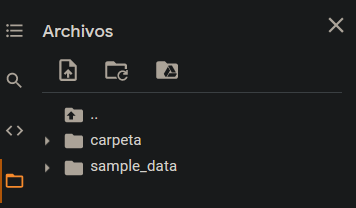

In [ ]:
# Esto nos entrega los elementos que conforman la ruta
print(new_file_path.parts)

('carpeta',)


In [ ]:
# esto es para obtener la ruta completa
print(new_file_path.absolute())

/content/carpeta


In [ ]:
 # Para agregar algun nuevo elemento a la ruta
 new_file_path /= 'apuntes.txt'
 new_file_path.touch() # Con esta linea generamos el archivo
 print(new_file_path)

carpeta/apuntes.txt


In [ ]:
# Si queremos realizar alguna iteracion sobre el contenido de una carpeta
for file_name in new_file_path.parent.iterdir(): 
  if file_name.match('*.txt'):
    print(file_name)

# parent hace referencia a la carpeta que contiene a file_name
print(new_file_path.absolute().parent)
print(new_file_path.absolute().parent.parent)

carpeta/apuntes.txt
/content/carpeta
/content


In [ ]:
# para eliminar archivo se utiliza unlink
print(new_file_path)
new_file_path.unlink()
print(new_file_path.exists())

carpeta/apuntes.txt
False
